# Mathematical Underpinnings - Lab 2

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [22]:
def population_risk(a, sigma_eps):
    # (a - 1)^2 * sigma_eps^2
    return (a - 1)**2 + sigma_eps**2

### b)

In [44]:
# sampling
import numpy as np
n = 50 
sigma_eps = 1

# X ~ N(0, 1)
# Y ~ N(0, sigma_eps^2)
X = np.random.normal(0, 1, n)
eps = np.random.normal(0, sigma_eps, n)
Y = X + eps

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [45]:
def empirical_risk(a, x, y):
    return np.mean((y - a * x)**2)

### c)

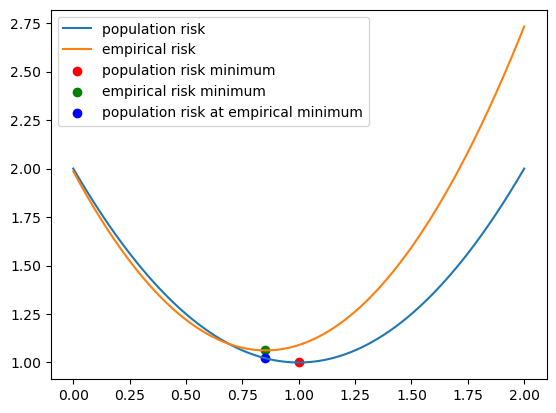

In [48]:
# code, plot

import matplotlib.pyplot as plt
a = np.linspace(0, 2, 100)
a_hat = min(a, key=lambda a_: empirical_risk(a_, X, Y))
plt.plot(a, population_risk(a, sigma_eps), label='population risk')
plt.plot(a, [empirical_risk(a_, X, Y) for a_ in a], label='empirical risk')
plt.scatter(1, population_risk(1, sigma_eps), label='population risk minimum', color='red')
plt.scatter(a_hat, empirical_risk(a_hat, X, Y), label='empirical risk minimum', color='green')
plt.scatter(a_hat, population_risk(a_hat, sigma_eps), label='population risk at empirical minimum', color='blue')
plt.legend()
plt.show()




### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

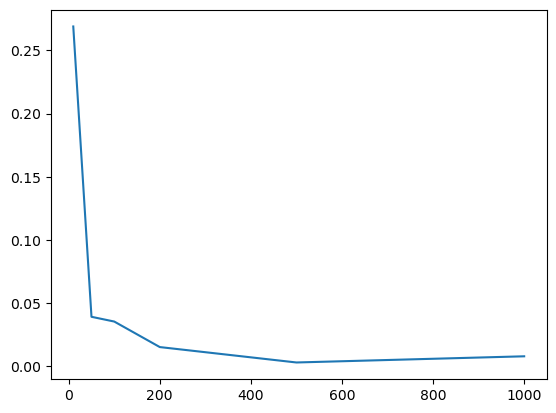

In [55]:
# excess risk

L = 200
ns = [10, 50, 100, 200, 500, 1000]
excess_risks = []
for n in ns:
    excess_risks_n = []
    for _ in range(L):
        X = np.random.normal(0, 1, n)
        eps = np.random.normal(0, sigma_eps, n)
        Y = X + eps
        a_hat = min(a, key=lambda a_: empirical_risk(a_, X, Y))
        excess_risks_n.append(population_risk(a_hat, sigma_eps) - empirical_risk(a_hat, X, Y))
    excess_risks.append(np.mean(excess_risks_n))

plt.plot(ns, excess_risks)  
plt.show()


